# Index

1. [Packages](#packages)
2. [Estandarizar datos](#estandarizar-datos)
3. [Guardar los datos estandarizados](#guardar-los-datos-estandarizados)

# Packages

In [ ]:
import sys
import os
sys.path.append(os.path.abspath(".."))

import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ,OneHotEncoder



In [34]:
# Cargar el DataFrame filtrado desde data/processed
data_filtrada = pd.read_csv('../data/processed/EDA-data_filtrada.csv')

# Verificar la carga
print('Shape de data_filtrada:', data_filtrada.shape)
print('Columnas:', data_filtrada.columns.tolist())

Shape de data_filtrada: (42467, 24)
Columnas: ['transaction_datetime', 'amount', 'user_age', 'user_income', 'device_type', 'os_type', 'browser', 'country', 'city_size', 'num_products', 'repeat_customer', 'account_age_days', 'previous_chargebacks', 'transaction_hour', 'transaction_day', 'transaction_month', 'is_night', 'is_weekend', 'amount_to_income_ratio', 'avg_product_price', 'high_value_transaction', 'new_customer', 'is_fraud', 'user_id']


# Estandarizar datos

In [27]:
# Separate features and target
X = data_filtrado.drop(['is_fraud', 'transaction_datetime','user_id'], axis=1)
y = data_filtrado['is_fraud']

# Identify column types
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Columnas numéricas:", numerical_cols)
print("Columnas categóricas:", categorical_cols)


Columnas numéricas: ['amount', 'user_age', 'user_income', 'num_products', 'repeat_customer', 'account_age_days', 'previous_chargebacks', 'transaction_hour', 'transaction_day', 'transaction_month', 'is_night', 'is_weekend', 'amount_to_income_ratio', 'avg_product_price', 'high_value_transaction', 'new_customer']
Columnas categóricas: ['device_type', 'os_type', 'browser', 'country', 'city_size']


In [ ]:
# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), #Reemplazar valores faltantes con la mediana
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), #Reemplazar valores faltantes con  los valores más comunes
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first')) # Usar variables dummies
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_processed = preprocessor.fit_transform(X)
column_names = preprocessor.get_feature_names_out()
X_processed_df = pd.DataFrame(X_processed, columns=column_names)
X_processed_df.head()

,num__amount,num__user_age,num__user_income,num__num_products,num__repeat_customer,num__account_age_days,num__previous_chargebacks,num__transaction_hour,num__transaction_day,num__transaction_month,...,cat__browser_Edge,cat__browser_Firefox,cat__browser_Safari,cat__country_BR,cat__country_MX,cat__country_UK,cat__country_US,cat__city_size_Rural,cat__city_size_Suburban,cat__city_size_Urban
0,0.085296,-0.599782,-0.824358,0.708357,0.653843,0.786458,-0.314551,0.0,-0.010378,-0.717800,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.344268,-0.599782,-1.110507,-0.706491,0.653843,0.000000,-0.314551,0.0,-0.010378,0.731389,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.375507,-1.330169,-0.506407,-0.706491,-1.529420,0.367014,-0.314551,0.0,-1.509453,-0.717800,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.416343,0.191470,0.932872,1.415780,0.653843,-0.157292,-0.314551,0.0,0.989005,-1.587314,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.095125,-0.112858,0.589186,0.000933,0.653843,2.097222,-0.314551,0.0,-0.010378,-0.717800,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# Guardar los datos estandarizados

In [30]:
# Definir el directorio de salida
from pathlib import Path
processed_dir = Path('../data/processed')
processed_dir.mkdir(parents=True, exist_ok=True)

X_processed_df.to_csv(processed_dir / 'Preparation-X_processed_df.csv', index=False)

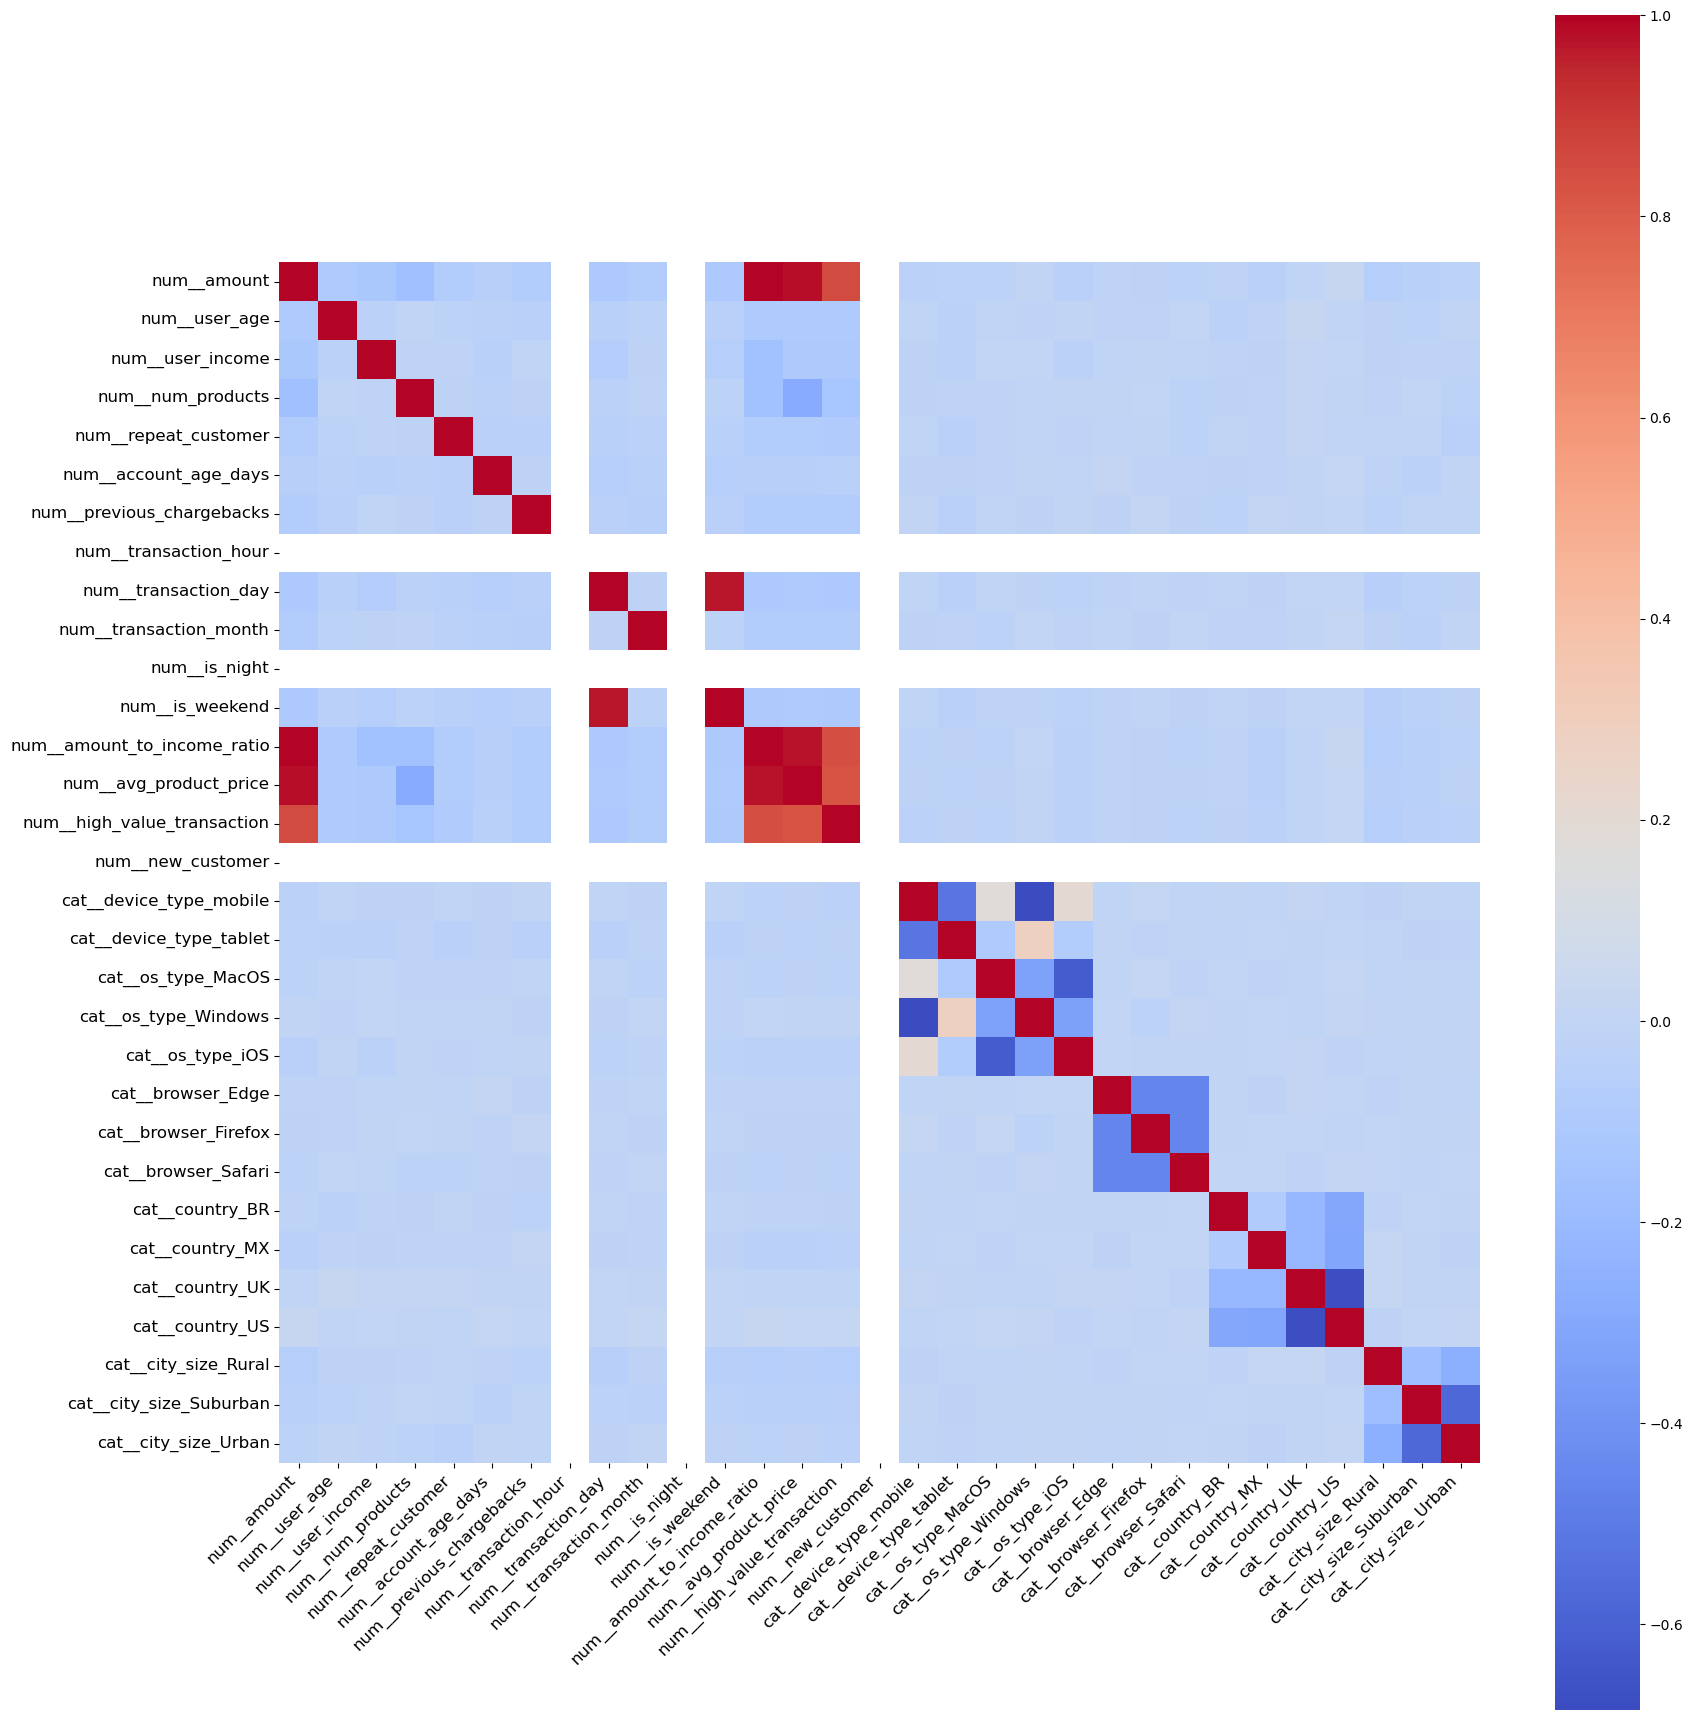

In [ ]:
#Matriz de Correlacion
#Verifiquemos si hay correlacion entre los datos
from seaborn import heatmap
corr = X_processed_df.corr(method="pearson").corr()
#Resulta más intuitivo ver la matriz de correlación a través de un gráfico - heatmap de seaborn

plt.figure(figsize=(18,18)) # Aumenta el tamaño del gráfico para más espacio
#Genero el mapa de calor
ax = sns.heatmap(corr, 
            cbar = True, 
            square = True, 
            annot=False,
            fmt= '.2f',
            annot_kws={'size': 12},
            cmap= 'coolwarm') 
# Ajusta el tamaño de fuente de los ticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=12)
plt.tight_layout()
plt.show()